In [322]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve, GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline

In [323]:
train_data = pd.read_csv('train.csv')

In [324]:
test_data = pd.read_csv('test.csv')

In [325]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,0,8,0,1,6,4,0,5,0
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,1,10,3,3,10,7,1,7,1
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,0,7,3,3,0,0,0,0,2
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,0,8,3,3,8,7,3,0,3
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,1,6,3,3,2,2,2,2,4


In [326]:
train_data.shape

(1028, 34)

In [327]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 34 columns):
Age                         1028 non-null int64
Attrition                   1028 non-null int64
BusinessTravel              1028 non-null object
DailyRate                   1028 non-null int64
Department                  1028 non-null object
DistanceFromHome            1028 non-null int64
Education                   1028 non-null int64
EducationField              1028 non-null object
EmployeeCount               1028 non-null int64
EmployeeNumber              1028 non-null int64
EnvironmentSatisfaction     1028 non-null int64
Gender                      1028 non-null object
HourlyRate                  1028 non-null int64
JobInvolvement              1028 non-null int64
JobLevel                    1028 non-null int64
JobRole                     1028 non-null object
JobSatisfaction             1028 non-null int64
MaritalStatus               1028 non-null object
MonthlyIncome          

In [328]:
train_data.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID
count,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.0,1028.000000,1028.000000,1028.000000,1028.000000,...,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000,1028.000000
mean,36.999027,0.167315,806.551556,9.010700,2.873541,1.0,710.198444,2.719844,65.451362,2.731518,...,2.732490,0.758755,11.417315,2.769455,2.763619,7.100195,4.263619,2.210117,4.141051,513.500000
std,9.444297,0.373439,407.043735,8.078418,1.032840,0.0,418.513656,1.089614,20.274229,0.703240,...,1.088774,0.836236,8.015441,1.302518,0.703005,6.316289,3.630387,3.288559,3.608460,296.902341
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.750000,2.000000,2.000000,1.0,351.750000,2.000000,48.000000,2.000000,...,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,256.750000
50%,36.000000,0.000000,813.000000,7.000000,3.000000,1.0,701.500000,3.000000,65.000000,3.000000,...,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,513.500000
75%,43.000000,0.000000,1157.250000,13.000000,4.000000,1.0,1069.250000,4.000000,83.000000,3.000000,...,4.000000,1.000000,16.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,770.250000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,1.0,1447.000000,4.000000,100.000000,4.000000,...,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1027.000000


In [329]:
datadict = pd.DataFrame(train_data.dtypes)
datadict

,0
Age,int64
Attrition,int64
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [330]:
datadict['MissingVal'] = train_data.isnull().sum()
datadict

,0,MissingVal
Age,int64,0
Attrition,int64,0
BusinessTravel,object,0
DailyRate,int64,0
Department,object,0
DistanceFromHome,int64,0
Education,int64,0
EducationField,object,0
EmployeeCount,int64,0
EmployeeNumber,int64,0


In [331]:
datadict['nunique'] = train_data.nunique().sum()
datadict

,0,MissingVal,nunique
Age,int64,0,5122
Attrition,int64,0,5122
BusinessTravel,object,0,5122
DailyRate,int64,0,5122
Department,object,0,5122
DistanceFromHome,int64,0,5122
Education,int64,0,5122
EducationField,object,0,5122
EmployeeCount,int64,0,5122
EmployeeNumber,int64,0,5122


In [332]:
train_data.drop(['EmployeeNumber','EmployeeCount'], axis=1,inplace = True)
test_data.drop(['EmployeeNumber', 'EmployeeCount'], axis = 1,inplace = True)

In [333]:
corr = train_data.corr()

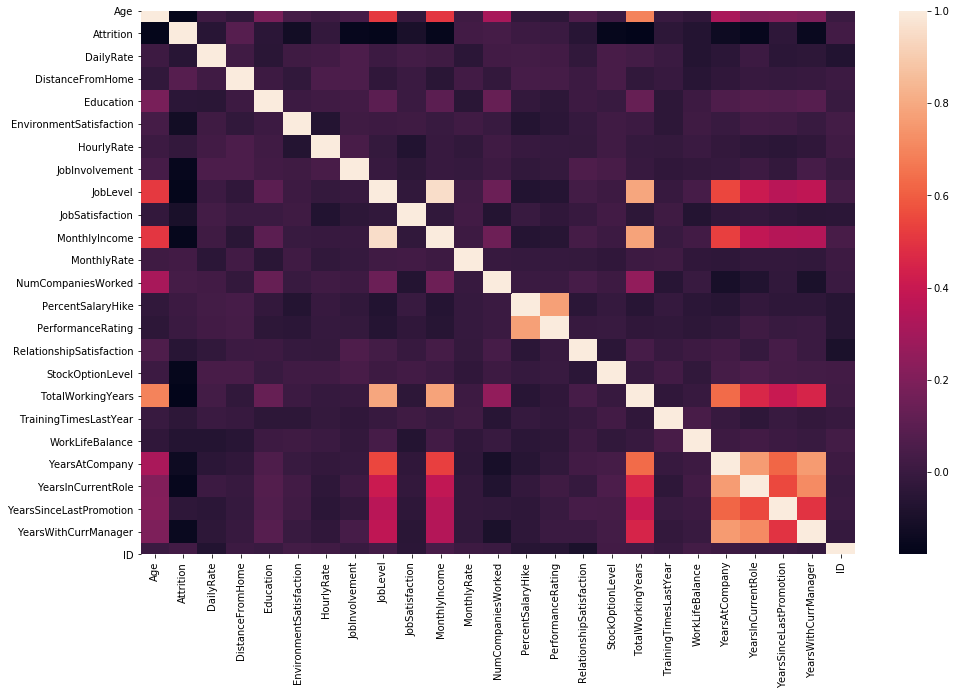

In [334]:
fig_dims = (16,10)
fig,ax = plt.subplots(figsize = fig_dims)
sns.heatmap(corr, ax=ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028E27961688>,
      dtype=object)

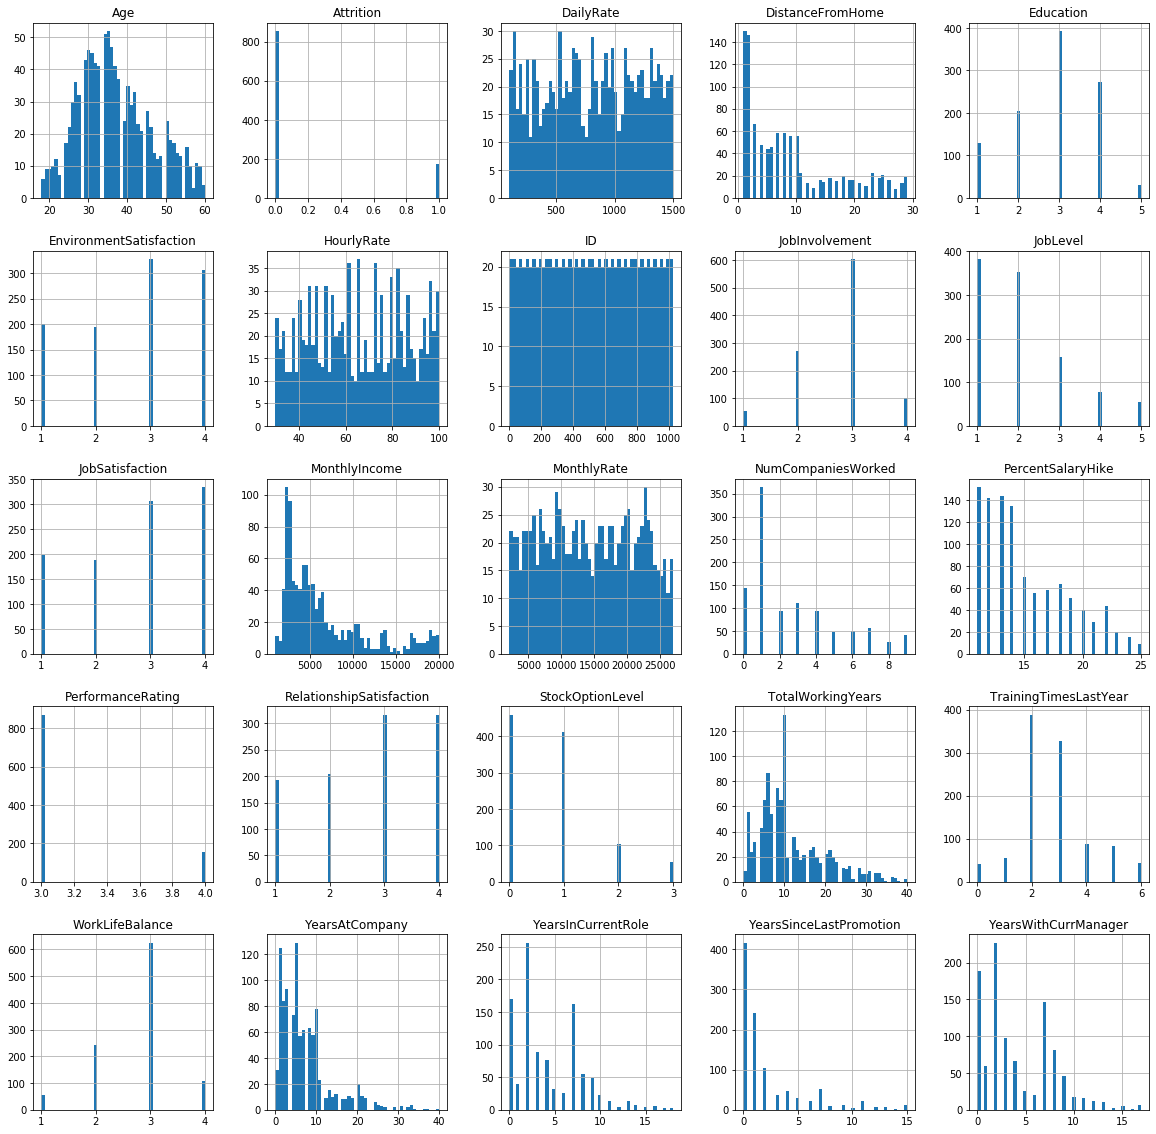

In [335]:
train_data.hist(bins = 50, figsize = (20,20))

In [336]:
target = 'Attrition'
IDcol = 'ID'

In [337]:
from sklearn.preprocessing import LabelEncoder

In [338]:
LabelEncoder_X = LabelEncoder()
train_data['BusinessTravel'] = LabelEncoder_X.fit_transform(train_data['BusinessTravel'])
train_data['Department'] = LabelEncoder_X.fit_transform(train_data['Department'])
train_data['EducationField']= LabelEncoder_X.fit_transform(train_data['EducationField'])
train_data['Gender'] = LabelEncoder_X.fit_transform(train_data['Gender'])
train_data['JobRole'] = LabelEncoder_X.fit_transform(train_data['JobRole'])
train_data['MaritalStatus'] = LabelEncoder_X.fit_transform(train_data['MaritalStatus'])
train_data['OverTime'] = LabelEncoder_X.fit_transform(train_data['OverTime'])

test_data['BusinessTravel'] = LabelEncoder_X.fit_transform(test_data['BusinessTravel'])
test_data['Department'] = LabelEncoder_X.fit_transform(test_data['Department'])
test_data['EducationField'] = LabelEncoder_X.fit_transform(test_data['EducationField'])
test_data['Gender'] = LabelEncoder_X.fit_transform(test_data['Gender'])
test_data['JobRole'] = LabelEncoder_X.fit_transform(test_data['JobRole'])
test_data['MaritalStatus'] = LabelEncoder_X.fit_transform(test_data['MaritalStatus'])
test_data['OverTime'] = LabelEncoder_X.fit_transform(test_data['OverTime'])

In [339]:

train_data['JobLevel_MonthlyIncome'] = train_data.JobLevel * train_data.MonthlyIncome
train_data['PerRating_PerSalary'] = train_data.PerformanceRating * train_data.PercentSalaryHike
train_data['Years'] = train_data.YearsAtCompany * train_data.YearsInCurrentRole
train_data['Years_2'] = train_data.YearsAtCompany * train_data.YearsSinceLastPromotion
train_data['Years_3'] = train_data.YearsAtCompany * train_data.YearsWithCurrManager

In [340]:
test_data['JobLevel_MonthlyIncome'] = test_data.JobLevel * test_data.MonthlyIncome
test_data['PerRating_PerSalary'] = test_data.PerformanceRating * test_data.PercentSalaryHike
test_data['Years'] = test_data.YearsAtCompany * test_data.YearsInCurrentRole
test_data['Years_2'] = test_data.YearsAtCompany * test_data.YearsSinceLastPromotion
test_data['Years_3'] = test_data.YearsAtCompany * test_data.YearsWithCurrManager

In [341]:
train_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,ID,JobLevel_MonthlyIncome,PerRating_PerSalary,Years,Years_2,Years_3
0,41,1,2,1102,2,1,2,1,2,0,...,6,4,0,5,0,11986,33,24,0,30
1,49,0,1,279,1,8,1,1,3,1,...,10,7,1,7,1,10260,92,70,10,70
2,37,1,2,1373,1,2,2,4,4,1,...,0,0,0,0,2,2090,45,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,...,8,7,3,0,3,2909,33,56,24,0
4,27,0,2,591,1,2,1,3,1,1,...,2,2,2,2,4,3468,36,4,4,4


In [342]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 37 columns):
Age                         1028 non-null int64
Attrition                   1028 non-null int64
BusinessTravel              1028 non-null int32
DailyRate                   1028 non-null int64
Department                  1028 non-null int32
DistanceFromHome            1028 non-null int64
Education                   1028 non-null int64
EducationField              1028 non-null int32
EnvironmentSatisfaction     1028 non-null int64
Gender                      1028 non-null int32
HourlyRate                  1028 non-null int64
JobInvolvement              1028 non-null int64
JobLevel                    1028 non-null int64
JobRole                     1028 non-null int32
JobSatisfaction             1028 non-null int64
MaritalStatus               1028 non-null int32
MonthlyIncome               1028 non-null int64
MonthlyRate                 1028 non-null int64
NumCompaniesWorked          1

In [343]:
from sklearn.preprocessing import StandardScaler 
# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(train_data) 

StandardScaler()

In [344]:
X = train_data.drop(['ID','Attrition'],axis=1)
y = train_data['Attrition']

In [345]:
features = ['Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
        'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

In [346]:
X = X[features]

In [347]:
# Splitting dataset for validation
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [348]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()

In [349]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 100)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 20, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

learning_rate = [float(x) for x in np.arange(0.01,0.5,0.01)]

subsample = [float(x) for x in np.arange(0.5,0.9,0.01)]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate' : learning_rate,
               'subsample' : subsample,
               }
print(random_grid)

{'n_estimators': [50, 54, 59, 63, 68, 72, 77, 81, 86, 90, 95, 100, 104, 109, 113, 118, 122, 127, 131, 136, 140, 145, 150, 154, 159, 163, 168, 172, 177, 181, 186, 190, 195, 200, 204, 209, 213, 218, 222, 227, 231, 236, 240, 245, 250, 254, 259, 263, 268, 272, 277, 281, 286, 290, 295, 300, 304, 309, 313, 318, 322, 327, 331, 336, 340, 345, 350, 354, 359, 363, 368, 372, 377, 381, 386, 390, 395, 400, 404, 409, 413, 418, 422, 427, 431, 436, 440, 445, 450, 454, 459, 463, 468, 472, 477, 481, 486, 490, 495, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 20, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.29000000000000004, 0.3, 0.31, 0.32, 0.33, 0.3

In [350]:
from sklearn.model_selection import RandomizedSearchCV

In [351]:
random_cv = RandomizedSearchCV(estimator=model,
            param_distributions=random_grid,
            cv=5, n_iter=50,
            scoring = 'precision',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=0)

In [352]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   14.9s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:   47.3s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  2.9min finished


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=50,
                   n_jobs=4,
                   param_distributions={'learning_rate': [0.01, 0.02, 0.03,
                                                          0.04, 0.05,
                                                          0.060000000000000005,
                                                          0.06999999999999999,
                                                          0.08, 0.09,
                                                          0.09999999999999999,
                                                          0.11, 0.12, 0.13,
                                                          0.14,
                                                          0.15000000000000002,
                                                          0.16, 0.17,
                                                          0.18000000000000002,
                                                          0.19, 0.2,
    

In [353]:
random_cv.best_params_

{'subsample': 0.5800000000000001,
 'n_estimators': 481,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 15,
 'learning_rate': 0.47000000000000003}

In [354]:
model = GradientBoostingClassifier(n_estimators=80,learning_rate = 0.47,min_samples_split=5,min_samples_leaf=4,max_features='sqrt',max_depth=15, subsample=0.58,random_state=0)

In [355]:
model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.47, max_depth=15,
                           max_features='sqrt', min_samples_leaf=4,
                           min_samples_split=5, n_estimators=80, random_state=0,
                           subsample=0.58)

In [356]:
y_train_pred = model.predict(X_train)

In [357]:
y_pred = model.predict(X_test)

In [358]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

In [359]:
# Accuracy on training data
print(accuracy_score(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

1.0
[[679   0]
 [  0 143]]


In [360]:
# Accuracy on validation data
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8883495145631068
[[171   6]
 [ 17  12]]


In [362]:
X_test2 = test_data.drop(['ID'],axis=1)

In [363]:
X_test2 = X_test2[features]

In [364]:
y_pred2 = model.predict(X_test2)

In [365]:
y_pred2

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [366]:
output = pd.DataFrame({'ID': test_data.ID, 'Attrition': y_pred2})
output.to_csv('GBC_final.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
